# Redes neuronales de grafos





**Torchnet** estandariza experimentos con PyTorch, facilitando el manejo de datos, métricas y visualización en modelos de aprendizaje profundo.

**NetworkX** permite crear, analizar y visualizar grafos, calculando propiedades como centralidad o caminos más cortos. 
Juntas, son ideales para construir grafos con NetworkX y procesarlos en modelos como GNNs usando PyTorch y Torchnet.

## 1. Las matemáticas básicas para datos estructurados en grafos:

Definiendo estas dos representaciones, puedes modelar cualquier cosa que desees con grafos. 

La conectividad/estructura se define mediante una matriz $N\times N$, conocida como la matriz de adyacencia $A$. El elemento $i,j$ de $A$ nos dirá si el nodo $i$ está conectado al nodo $j$.
$$ X \in \mathbb{R}^{N\times F}$$

La ecuación de arriba representa una señal. Aquí, $F$ es el número de características. Por ejemplo, una imagen RGB tiene $F = 3$ características (correspondientes a los canales rojo, verde y azul), mientras que para una palabra, sería la dimensión del embedding.

In [1]:
!pip install torchnet networkx

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 822.6 kB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for torchnet: filename=torchnet-0.0.4-py3-none-any.whl size=29728 sha256=7e8554219531cb484733b8c27b20ed6aae9892f0970cad7063661ab96dfb72b0
  Stored in directory: /home/jupyter-user6/.cache/pip/wheels/f7/ae/94/9f5edd6871983f30967ad11d60ef434c3d1b007654de4c8065
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408196 sha256=6770cdf38e5fdaf4943ede9d6703bc0386456037bcd973ccb3e99eed218acdda
  Stored in directory: /home/jupyter-user6/.cache/pip/wheels/42/29/49/5bed207bac4578e4d2c0c5fc0226bfd33a7e2953ea56356855
Successfully built torchnet visdom
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -

In [2]:
import torch
def create_adj(size):
    a = torch.rand(size, size) # Genera una matriz aleatoria de tamaño (size x size) con valores entre 0 y 1
    a[a > 0.5] = 1
    a[a <= 0.5] = 0
 # Establece los elementos de la diagonal en 0 para eliminar auto-bucles
    for i in range(a.shape[0]):  # Recorre las filas
        for j in range(a.shape[1]): 
            if i == j:  # Si es un elemento diagonal (i == j)
                a[i, j] = 0  # Asigna 0 (sin auto-conexión)
    return a


# 2. Graph laplacian

### **Graph Laplacian**

El **Graph Laplacian** es una matriz que captura información sobre la estructura de un grafo, como la conectividad entre nodos y las propiedades espectrales de la red.

#### **Definiciones:**

1. **Matriz de Adyacencia $A$:**
   - Representa las conexiones entre los nodos. Si el nodo $i$ está conectado con el nodo $j$, entonces $A_{ij} = 1$, y 0 en caso contrario.

2. **Matriz de Grado $D$:**
   - Es una matriz diagonal donde $D_{i}$ es el número de conexiones (grado) del nodo $i$.

3. **Graph Laplacian no normalizada $L$:**
   $$
   L = D - A
   $$

4. **Graph Laplacian normalizada $L_{norm}$:**
   $$
   L_{norm} = I - D^{-1/2} A D^{-1/2}
   $$
   - $I$ es la matriz identidad.

### **Importancia del Graph Laplacian**

El Laplaciano de un grafo refleja la conectividad y estructura del grafo, útil para entender la difusión de información y cómo están relacionados los nodos. El Laplaciano normalizado ajusta este análisis para mejorar la estabilidad y robustez en grafos grandes y desbalanceados. El análisis espectral de grafos estudia los eigenvalores y eigenvectores del Laplaciano, permitiendo identificar comunidades y estructuras internas del grafo. Todo esto es esencial en tareas como el clustering, segmentación de grafos y aprendizaje en redes



#### Ejercicio: Obten la matriz de adyacencia, la matriz de grados, el laplaciano y el laplaciano normalizado del  siguiente grafo:
![](ejercicio_laplaciano.png)

Esto se puede representar en la **matriz de adyacencia** $A$de la siguiente manera:

$$
A = 
\begin{pmatrix}
0 & 1 & 1 & 0 \\
1 & 0 & 0 & 1 \\
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0
\end{pmatrix}
$$

Ahora, calculamos la **matriz de grados** $D$ sumando las filas de la matriz de adyacencia para obtener los grados de cada nodo:

$$
D = 
\begin{pmatrix}
2 & 0 & 0 & 0 \\
0 & 2 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 2
\end{pmatrix}
$$

El **Graph Laplacian** $L$ se calcula como  $L = D - A $:

$$
L = 
\begin{pmatrix}
2 & -1 & -1 & 0 \\
-1 & 2 & 0 & -1 \\
-1 & 0 & 1 & 0 \\
0 & -1 & 0 & 2
\end{pmatrix}$$
El Laplaciano normalizado  $L_{\text{norm}}$ se calcula utilizando la fórmula:

$$
L_{\text{norm}} = D^{-\frac{1}{2}} A D^{-\frac{1}{2}}
$$

Donde $D^{-\frac{1}{2}}$ es la matriz diagonal que contiene los inversos de las raíces cuadradas de los elementos de la diagonal de $D$:

$$
D^{-\frac{1}{2}} = 
\begin{pmatrix}
\frac{1}{\sqrt{2}} & 0 & 0 & 0 \\
0 & \frac{1}{\sqrt{2}} & 0 & 0 \\
0 & 0 & \frac{1}{\sqrt{2}} & 0 \\
0 & 0 & 0 & \frac{1}{\sqrt{2}}
\end{pmatrix}
$$

5. Finalmente, multiplicamos las matrices:

$$
L_{\text{norm}} = 
\begin{pmatrix}
0 & -\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0 \\
-\frac{1}{\sqrt{2}} & 0 & 0 & -\frac{1}{\sqrt{2}} \\
-\frac{1}{\sqrt{2}} & 0 & 0 & 0 \\
0 & -\frac{1}{\sqrt{2}} & 0 & 0
\end{pmatrix}
$$


In [3]:
def degree_matrix(a):
  return torch.diag(a.sum(dim=-1))

a = create_adj(5)
d = degree_matrix(a)

print(d)

def graph_lapl(a):
  return degree_matrix(a)-a

print(a)
print(graph_lapl(a))

tensor([[2., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 3., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 2.]])
tensor([[0., 1., 0., 0., 1.],
        [0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 1.],
        [1., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0.]])
tensor([[ 2., -1.,  0.,  0., -1.],
        [ 0.,  0.,  0.,  0.,  0.],
        [-1., -1.,  3.,  0., -1.],
        [-1.,  0.,  0.,  1.,  0.],
        [-1., -1.,  0.,  0.,  2.]])


### Grafo de Petersen

El Grafo de Petersen es un grafo famoso en teoría de grafos, conocido por ser un ejemplo de grafo no planar y no Hamiltoniano. Es uno de los grafos más estudiados en teoría de grafos debido a sus propiedades interesantes y complejas. Tiene 10 vértices y 15 aristas, y se puede visualizar como un grafo con una estructura que se asemeja a una estrella de cinco puntas (un pentágono con diagonales).
![](Grafo-de-Petersen.png)

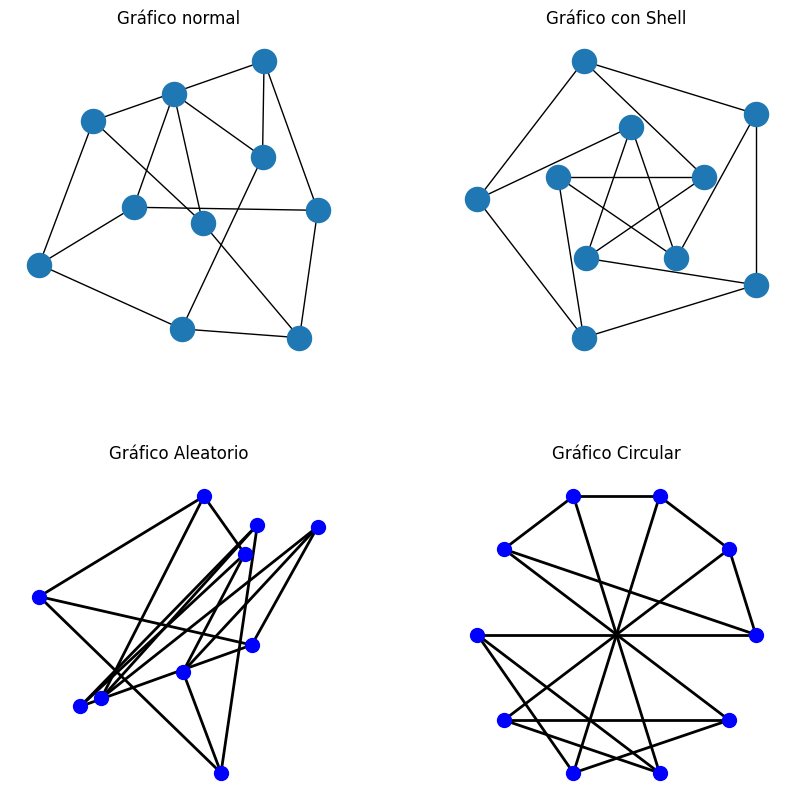

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

# Crear el grafo de Petersen
G = nx.petersen_graph()

fig, axes = plt.subplots(2, 2, figsize=(10, 10)) # Crear una figura con 2 filas y 2 columnas
plt.subplots_adjust(wspace=0.3, hspace=0.3)

axes[0, 0].set_title("Gráfico normal")
nx.draw(G, ax=axes[0, 0], with_labels=False, font_weight='bold')


axes[0, 1].set_title("Gráfico con Shell")
nx.draw_shell(G, nlist=[range(5, 10), range(5)], ax=axes[0, 1], with_labels=False, font_weight='bold')


options = {
   'node_color': 'blue',
   'node_size': 100,
   'width': 2,
}
axes[1, 0].set_title("Gráfico Aleatorio")
nx.draw_random(G, ax=axes[1, 0], **options)


axes[1, 1].set_title("Gráfico Circular")
nx.draw_circular(G, ax=axes[1, 1], **options)

# Mostrar todos los subgráficos
plt.show() 

# 3. Normalization

In [10]:
def degree_matrix_norm(a):
  return torch.diag(torch.pow(a.sum(dim=-1),-0.5))

def graph_lapl_norm(a):
  size = a.shape[-1]
  D_norm = degree_matrix_norm(a)
  L_norm = torch.ones(size) - (D_norm @ a @ D_norm )
  return L_norm

# 4. Tipo de predcción de GNN

Hasta ahora se ha hablado sobre la representación de entrada. Pero, ¿qué hay del output objetivo? La mayoría de las tareas serán clasificación de grafos y clasificación de nodos.

**Clasificación de grafos:** Tenemos muchos grafos y nos gustaría encontrar una etiqueta única para cada grafo individual, lo cual es una tarea supervisada.

**Clasificación de nodos:** Usualmente, en este tipo de tarea tenemos un grafo muy grande (>1000 nodos) y tratamos de encontrar una etiqueta para los nodos, lo que es una tarea semisupervisada.

El **aprendizaje semisupervisado** es un tipo de enfoque de aprendizaje automático que combina características del aprendizaje supervisado y no supervisado. En este tipo de aprendizaje, el modelo se entrena utilizando un conjunto de datos que contiene tanto ejemplos etiquetados (con la respuesta correcta) como no etiquetados (sin la respuesta).

# 5. Matemáticas para la capa de convoluciones de grafos

¿Cómo se forman las capas de convoluciones de grafos en la red neuronal?

Una red neuronal de grafos sería algo como lo siguiente:

$$ Y = (AX)W$$


1. **Estructura del grafo (A)**: El grafo tiene una matriz de adyacencia **A**, que indica cómo están conectados los nodos entre sí. Aunque la matriz **A** es binaria (es decir, contiene solo 0s y 1s), no nos da mucha información directa sobre la relación entre los nodos.

2. **Proceso de convolución**: En lugar de solo usar **A**, buscamos un operador que sea más expresivo y capaz de capturar mejor la relación entre los nodos. Al multiplicar este operador con una **señal de grafo** (que representa la información de los nodos), obtenemos una **nueva señal de grafo** transformada. Este proceso se puede expresar como una simple multiplicación de matrices, lo que hace que sea bastante eficiente.

3. **Parámetros entrenables**: El parámetro **W** es entrenable, lo que significa que durante el proceso de entrenamiento, el modelo aprenderá a ajustar este parámetro para mejorar sus predicciones.

En resumen, las capas de convolución de grafos permiten que una red neuronal aprenda de manera eficiente la estructura de un grafo y cómo la información de los nodos se propaga a través de él.



¿Qué es una señal de grafo?

Una señal de grafo es una función que asigna un valor a cada nodo en un grafo. Estos valores pueden representar diferentes tipos de información sobre los nodos, dependiendo de la aplicación. En lugar de tener solo conexiones entre los nodos, los grafos pueden tener señales que representen características, atributos o cualquier tipo de información relevante para cada nodo.

En términos sencillos, es una forma de etiquetar o asociar datos a cada nodo dentro de un grafo, y esta información puede usarse para realizar cálculos o predicciones, como en las redes neuronales de grafos (GNNs).
Ejemplo de señal de grafo

Supongamos que tienes un grafo que representa una red social, donde los nodos son personas y las conexiones entre ellos son amistades. Imagina que quieres predecir el nivel de influencia de cada persona en la red. Puedes asignar a cada nodo una "señal" que sea el nivel de influencia de cada persona.

# 6. General graph convolution

In [12]:
import torch
import torch.nn as nn

# Función para encontrar el valor propio máximo de la matriz Laplaciana
def find_eigmax(L):
    with torch.no_grad():  
        L_complex = torch.linalg.eigvals(L)  
        return torch.max(L_complex.real).item() 

# Función para calcular la aproximación de Chebyshev sobre el grafo
def chebyshev_Lapl(X, Lapl, thetas, order):
    list_powers = []  # Lista para almacenar los diferentes términos de la serie de Chebyshev
    nodes = Lapl.shape[0]  # Número de nodos en el grafo

    # Inicialización de la señal de entrada
    T0 = X.float()

    # Normalización del Laplaciano para que sus valores propios estén en un rango adecuado
    eigmax = find_eigmax(Lapl)  
    L_rescaled = (2 * Lapl / eigmax) - torch.eye(nodes) 

    # Primer término de la serie de Chebyshev (T0)
    y = T0 * thetas[0] 
    list_powers.append(y)

    # Calcula el segundo término de la serie (T1)
    T1 = torch.matmul(L_rescaled, T0)  # Aplica la matriz Laplaciana normalizada sobre T0
    list_powers.append(T1 * thetas[1])  # Multiplica por el segundo coeficiente de Chebyshev

    # Cálculo de los siguientes términos de la serie de Chebyshev
    for k in range(2, order):  
        T2 = 2 * torch.matmul(L_rescaled, T1) - T0  
        list_powers.append((T2 * thetas[k]))  #
        T0, T1 = T1, T2  

    # Apila los términos calculados en una sola matriz (dimensión: nodos x términos de la serie)
    y_out = torch.stack(list_powers, dim=-1)

    # Redimensiona la salida: "nodes" filas y una columna que contenga todas las características concatenadas
    y_out = y_out.view(nodes, -1)  

    return y_out  # Devuelve la señal aproximada

# Parámetros de entrada
features = 3  # Número de características de la señal de entrada (por ejemplo, RGB = 3)
out_features = 50  # Número de características de salida deseadas
a = create_adj(10)  # Crea la matriz de adyacencia para un grafo con 10 nodos
L = graph_lapl_norm(a)  # Normaliza el Laplaciano del grafo usando la matriz de adyacencia
x = torch.rand(10, features)  # Crea una entrada aleatoria de 10 nodos con 3 características cada uno
power_order = 4  # Número de términos (hop o pasos) en la serie de Chebyshev
thetas = nn.Parameter(torch.rand(4))  # Parámetros aprendibles para los coeficientes de la serie de Chebyshev

# Calcula la aproximación de Chebyshev de la señal sobre el grafo
out = chebyshev_Lapl(x, L, thetas, power_order)

# Muestra la forma de la salida de la aproximación de Chebyshev (debería ser nodos x (order * características))
print('cheb approx out powers concatenated:', out.shape)

# Como hemos concatenado los términos de la serie de Chebyshev, la salida tendrá un número de características = order * características
linear = nn.Linear(4 * 3, out_features)  # Crea una capa lineal que mapea la salida de Chebyshev a la salida deseada

# Calcula la salida de la capa lineal
layer_out = linear(out)

# Muestra la forma de la salida final de la capa lineal
print('Layers output:', layer_out.shape)


cheb approx out powers concatenated: torch.Size([10, 12])
Layers output: torch.Size([10, 50])


### Resumen:

Este código implementa una convolución de Chebyshev en un grafo utilizando su Laplaciano normalizado, transformando una señal de entrada (como características de nodos) mediante multiplicación de matrices. Posteriormente, los resultados se pasan por una capa lineal para obtener la salida final.

### ¿Qué hace la aproximación de Chebyshev?

En el contexto de grafos y redes neuronales, la aproximación de Chebyshev se utiliza principalmente para **aproximar convoluciones sobre grafos**. Cuando se aplican convoluciones en grafos, uno de los problemas es que la estructura de un grafo puede ser muy compleja, lo que hace difícil calcular las convoluciones directamente.

La idea detrás de la aproximación de Chebyshev es **expresar las convoluciones de un grafo en términos de una serie de polinomios de Chebyshev**. Estos polinomios permiten aproximar la acción de un operador (como el Laplaciano de un grafo) sin necesidad de calcular todos los vectores propios de la matriz del grafo, lo que puede ser costoso computacionalmente.

### ¿Cómo funciona la aproximación de Chebyshev?

La aproximación de Chebyshev se basa en una **serie recursiva** de términos calculados usando las potencias de una matriz normalizada del grafo (como el Laplaciano). Para entender esto mejor, aquí te dejo los pasos:

1. **Matriz de Laplaciano**: En un grafo, el Laplaciano es una matriz que codifica la conectividad de los nodos del grafo. Es la base de muchas operaciones en redes neuronales gráficas.

2. **Escalado y normalización**: Para estabilizar la aproximación, el Laplaciano se escala de modo que sus valores propios caigan dentro de un rango adecuado (por lo general, entre -1 y 1). Esto se hace mediante un proceso llamado **normalización**.

3. **Serie de Chebyshev**: La serie de Chebyshev se utiliza para aproximar la operación de convolución en grafos. Esta serie es una secuencia de términos calculados recursivamente a partir de los valores previos. Cada término en la serie puede ser visto como una "potencia" de la matriz normalizada del grafo.

   Los primeros términos de la serie de Chebyshev son:
   -  $T_0 = X$ (la entrada original, que es la señal o características de los nodos)
   - $T_1 = L_{\text{rescaled}} \cdot X$(la matriz del grafo multiplicada por la señal)
   - Para  $k \geq 2:T_k = 2 \cdot L_{\text{rescaled}} \cdot T_{k-1} - T_{k-2}$

   Cada término se pondera con un **coeficiente** llamado $\theta_k$, que es entrenable en el modelo.

4. **Aproximación**: Al combinar varios de estos términos, obtenemos una **aproximación de la convolución** que es más eficiente computacionalmente que calcularla directamente.

### ¿Por qué usar la aproximación de Chebyshev?

- **Eficiencia**: Calculando una serie finita de potencias del Laplaciano normalizado, podemos evitar calcular todas las potencias o vectores propios del grafo, lo cual sería mucho más costoso computacionalmente.
- **Escalabilidad**: La aproximación de Chebyshev permite manejar grafos grandes con muchas conexiones entre nodos sin perder precisión, a pesar de que estamos limitando el número de términos en la serie.
- **Flexibilidad**: La técnica permite controlar el número de términos de la serie (el "orden" de la aproximación), lo que proporciona un equilibrio entre precisión y eficiencia.

### Ejemplo de uso:

En una red neuronal gráfica (GNN), si queremos realizar una operación de convolución sobre un grafo, podríamos usar la aproximación de Chebyshev para hacerlo de manera más eficiente. Esto es especialmente útil cuando el grafo es muy grande y no queremos realizar cálculos complejos sobre todas las conexiones. La serie de Chebyshev ofrece una manera de hacer esto de manera rápida y efectiva, manteniendo una buena aproximación de la convolución deseada.


# 7. Implementando una Red Neuronal de Convolución sobre Grafos (GCN) para un conjunto de datos pequeño
Definición de la capa GCN:
$$ Y = L_{norm} X W $$
$$ L_{norm}^{mod} = D^{-1/2}(A+I)D^{-1/2} $$
La ecuación muestra cómo una capa GCN transforma las características $X$ de los nodos en un grafo:

$A+I$: Añade una conexión propia (self-loop) a cada nodo.

$D^{−1/2}$: Es la matriz diagonal con los grados normalizados, que asegura que los valores estén correctamente escalados.

$L_{norm}$:  Es el operador Laplaciano normalizado del grafo.

$W$: Es un conjunto de pesos aprendibles de la capa.

$Y$: Es la salida de la capa, que contiene las características transformadas.


In [20]:
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F

def device_as(x,y):
  return x.to(y.device)

#Calcula \( D^{-1/2} \), la matriz de grados normalizada.
def calc_degree_matrix_norm(a):
  return torch.diag_embed(torch.pow(a.sum(dim=-1),-0.5))
# Crea la matriz Laplaciana normalizada
def create_graph_lapl_norm(a):
  size = a.shape[-1]
  a +=  device_as(torch.eye(size),a)
  D_norm = calc_degree_matrix_norm(a)
  L_norm = torch.bmm( torch.bmm(D_norm, a) , D_norm )
  return L_norm

class GCN(nn.Module):
    """
    Una capa de Redes Neuronales Convolucionales de Grafos (GCN).
    - Combina información de las características de los nodos y su estructura (matriz de adyacencia).
    - Propaga las características de los nodos a lo largo de las conexiones del grafo.
    """

    def __init__(self, in_features, out_features, bias=True):
        """
        - `bias`: Si incluye un sesgo en la transformación lineal.
        """
        super().__init__()
        self.linear = nn.Linear(in_features, out_features, bias=bias)

    def forward(self, X, A):
        """
        Realiza el paso hacia adelante.
        - `X`: Matriz de características de los nodos 
        """
        L = create_graph_lapl_norm(A)  # 1. Calcula la Laplaciana normalizada.
        x = self.linear(X)            # 2. Aplica transformación lineal a las características.
        return torch.bmm(L, x)        # 3. Difunde características usando la estructura del grafo.


## Dataset MUTAG
El dataset **MUTAG**  contiene información sobre moléculas químicas representadas como grafos.

### Características principales del dataset MUTAG:
1. **Estructura**:
   - Cada grafo representa una molécula química.
   - Los nodos representan átomos, y las aristas representan enlaces químicos entre ellos.
   - Las etiquetas de los nodos (atributos) pueden representar el tipo de átomo (como carbono, oxígeno, etc.).

2. **Etiquetas**:
   - Cada grafo está etiquetado con una clase binaria:
     - **1**: La molécula tiene potencial mutagénico (puede causar mutaciones).
     - **0**: La molécula no es mutagénica.

3. **Tamaño**:
   - Contiene **188 grafos** en total.

4. **Aplicaciones**:
   - Permite evaluar modelos de aprendizaje automático en la tarea de predecir propiedades químicas basadas en la estructura molecular.

5. **Formato**:
   - Los datos suelen incluir:
     - **Matriz de adyacencia** para cada grafo, que describe la conectividad entre los nodos.
     - **Atributos de nodos** que indican características químicas.
     - **Etiquetas de grafo** que corresponden a la clasificación binaria (mutagénico o no mutagénico).

### Usos típicos del dataset MUTAG:
- **Clasificación de grafos**: Predecir si una molécula es mutagénica o no.
- **Aprendizaje basado en grafos**: Probar modelos como redes neuronales convolucionales de grafos (GCN), redes de atención en grafos (GAT), o embeddings de grafos.
- **Química computacional**: Estudiar cómo las estructuras químicas afectan las propiedades moleculares.


In [ ]:
import torchnet as tnt  .
import os  # Para interactuar con el sistema de archivos.
import networkx as nx  
import numpy as np  
import torch  

# Convierte un índice (número) en un vector codificado en formato one-hot.
def indices_to_one_hot(number, nb_classes, label_dummy=-1):
    if number == label_dummy:
        return np.zeros(nb_classes)  # Devuelve un vector de ceros si el número es igual al valor dummy.
    else:
        return np.eye(nb_classes)[number]  # Devuelve un vector one-hot para el índice dado.

# Extrae las señales del grafo (atributos de los nodos).
def get_graph_signal(nx_graph):
    d = dict((k, v) for k, v in nx_graph.nodes.items())  # Obtiene los atributos de los nodos.
    x = []
    invd = {}
    j = 0
    for k, v in d.items():
        x.append(v['attr_dict'])  # Agrega los atributos de cada nodo a la lista.
        invd[k] = j  # Mapea cada nodo a un índice secuencial.
        j = j + 1
    return np.array(x)  # Devuelve los atributos como un array de NumPy.

# Carga los datos del dataset basado en MUTAG desde los archivos dados.
def load_data(path, ds_name, use_node_labels=True, max_node_label=10):
    node2graph = {}  # Mapea nodos individuales a grafos específicos.
    Gs = []  # Lista de grafos.
    data = []  # Lista para almacenar datos adicionales (si es necesario).
    
    # Nombres de los archivos del dataset.
    dataset_graph_indicator = f"{ds_name}_graph_indicator.txt"
    dataset_adj = f"{ds_name}_A.txt"
    dataset_node_labels = f"{ds_name}_node_labels.txt"
    dataset_graph_labels = f"{ds_name}_graph_labels.txt"

    # Rutas completas a los archivos del dataset.
    path_graph_indicator = os.path.join(path, dataset_graph_indicator)
    path_adj = os.path.join(path, dataset_adj)
    path_node_lab = os.path.join(path, dataset_node_labels)
    path_labels = os.path.join(path, dataset_graph_labels)

    # Leer el archivo que indica a qué grafo pertenece cada nodo.
    with open(path_graph_indicator, "r") as f:
        c = 1  # Contador para los nodos.
        for line in f:
            node2graph[c] = int(line[:-1])  # Asocia el nodo al índice del grafo.
            if not node2graph[c] == len(Gs):  # Si el nodo pertenece a un nuevo grafo.
                Gs.append(nx.Graph())  # Crea un nuevo grafo.
            Gs[-1].add_node(c)  # Agrega el nodo al grafo correspondiente.
            c += 1

    # Leer el archivo que contiene las conexiones (adyacencias) entre nodos.
    with open(path_adj, "r") as f:
        for line in f:
            edge = line[:-1].split(",")  # Divide cada línea en nodos de un enlace.
            edge[1] = edge[1].replace(" ", "")  # Elimina espacios adicionales.
            Gs[node2graph[int(edge[0])] - 1].add_edge(int(edge[0]), int(edge[1]))  # Agrega la arista al grafo correspondiente.

    # Leer las etiquetas de los nodos (si se utilizan).
    if use_node_labels:
        with open(path_node_lab, "r") as f:
            c = 1
            for line in f:
                node_label = indices_to_one_hot(int(line[:-1]), max_node_label)  # Convierte las etiquetas a formato one-hot.
                Gs[node2graph[c] - 1].add_node(c, attr_dict=node_label)  # Agrega los atributos al nodo.
                c += 1

    # Leer las etiquetas de los grafos.
    labels = []
    with open(path_labels, "r") as f:
        for line in f:
            labels.append(int(line[:-1]))  # Agrega cada etiqueta a la lista de etiquetas.

    return list(zip(Gs, labels))  # Devuelve una lista de tuplas (grafo, etiqueta).

# Crea los loaders para los datasets de entrenamiento y validación.
def create_loaders(dataset, batch_size, split_id, offset=-1):
    train_dataset = dataset[:split_id]  # Divide el dataset para entrenamiento.
    val_dataset = dataset[split_id:]  # Divide el dataset para validación.
    return to_pytorch_dataset(train_dataset, offset, batch_size), to_pytorch_dataset(val_dataset, offset, batch_size)

# Convierte los datos del dataset en tensores de PyTorch.
def to_pytorch_dataset(dataset, label_offset=0, batch_size=1):
    list_set = []  # Lista para almacenar los datos procesados.
    for graph, label in dataset:
        F, G = get_graph_signal(graph), nx.to_numpy_array(graph)  # Obtiene las señales del grafo y su matriz de adyacencia.
        numOfNodes = G.shape[0]
        F_tensor = torch.from_numpy(F).float()  # Convierte las señales del grafo a tensores.
        G_tensor = torch.from_numpy(G).float()  # Convierte la matriz de adyacencia a un tensor.

        # Corrige las etiquetas para que sean índices base 0.
        if label == -1:
            label = 0
        label += label_offset

        list_set.append(tuple((F_tensor, G_tensor, label)))  # Agrega los datos procesados a la lista.

    dataset_tnt = tnt.dataset.ListDataset(list_set)  # Crea un dataset de TorchNet a partir de los datos.
    data_loader = torch.utils.data.DataLoader(dataset_tnt, shuffle=True, batch_size=batch_size)  # Crea un DataLoader de PyTorch.
    return data_loader

# Carga los datos del dataset MUTAG y crea los loaders.
dataset = load_data(path='./MUTAG/', ds_name='MUTAG',
                    use_node_labels=True, max_node_label=7)
train_dataset, val_dataset = create_loaders(dataset, batch_size=1, split_id=150, offset=0)
print('Data are ready')  # Imprime un mensaje indicando que los datos están listos.


In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F  

# Definimos la clase GNN que hereda de nn.Module para usar funcionalidades de redes neuronales de PyTorch
class GNN(nn.Module):
  
  # El constructor __init__ define los parámetros de la red y las capas
  def __init__(self,
                in_features = 7,  # Número de características de entrada por nodo
                hidden_dim = 64,  # Dimensiones de las características ocultas
                classes = 2,  # Número de clases para la clasificación
                dropout = 0.5):  # Tasa de dropout para evitar sobreajuste
    super(GNN, self).__init__()  # Llamada al constructor de la clase base nn.Module

    # Definimos las capas de convolución de grafos
    # Cada capa toma las características de entrada y las transforma a características de mayor dimensión
    self.conv1 = GCN(in_features, hidden_dim) 
    self.conv2 = GCN(hidden_dim, hidden_dim)  
    self.conv3 = GCN(hidden_dim, hidden_dim)  

    # Capa totalmente conectada  para la clasificación final
    self.fc = nn.Linear(hidden_dim, classes)  # Mapea la salida a las clases

    # Definimos el dropout
    self.dropout = dropout

  # Definimos el método forward, que es el paso hacia adelante de los datos a través de la red
  def forward(self, x, A):
    # Primero pasamos x por la primera capa de convolución, luego aplicamos ReLU
    x = self.conv1(x, A)
    x = F.relu(x)  # Función de activación ReLU para introducir no linealidad

    # Pasamos la salida a la segunda capa de convolución y nuevamente aplicamos ReLU
    x = self.conv2(x, A)
    x = F.relu(x)  # Función de activación ReLU

    # Pasamos la salida a la tercera capa de convolución y luego aplicamos el dropout
    x = self.conv3(x, A)
    x = F.dropout(x, p=self.dropout, training=self.training)  

    # Para la clasificación de grafos, agregamos las características de los nodos usando un promedio
   
    x = x.mean(dim=1)  # Promedio a lo largo de la dimensión de los nodos

    # Finalmente, pasamos la representación agregada del grafo por la capa totalmente conectada para obtener la predicción
    return self.fc(x)


In [26]:
# Definimos la función de pérdida para la clasificación multiclase (entropía cruzada).
criterion = torch.nn.CrossEntropyLoss()

# Determinamos si se puede usar GPU ('cuda') o si se debe usar la CPU.
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(f'Training on {device}')

# Inicializamos el modelo GNN con características de entrada (in_features), dimensión oculta y número de clases.
model = GNN(in_features = 7,
                hidden_dim = 128,
                classes = 2).to(device)

# Definimos el optimizador, en este caso el optimizador de gradiente estocástico (SGD) con tasa de aprendizaje de 0.01.
optimizer= torch.optim.SGD(model.parameters(), lr=0.01)

# Definimos la función de entrenamiento.
def train(train_loader):
    
    model.train()

    for data in train_loader: 
        optimizer.zero_grad()  # Limpiamos los gradientes del optimizador.
        X, A, labels = data
        X, A, labels = X.to(device), A.to(device), labels.to(device)  # Movemos los datos a la GPU o CPU según corresponda.
        out = model(X, A)  # Realizamos el pase hacia adelante (forward pass) a través del modelo.
        loss = criterion(out, labels) # Calculamos la pérdida de clasificación usando las predicciones y las etiquetas reales.
        loss.backward()  # Calculamos los gradientes mediante retropropagación.
        optimizer.step() # Actualizamos los parámetros del modelo utilizando el optimizador.

# Definimos la función de evaluación (test).
def test(loader):
    model.eval()
    
    correct = 0  # Contador de predicciones correctas.
    for data in loader:
        X, A, labels = data
        X, A, labels = X.cuda(), A.cuda(), labels.cuda()  
        out = model(X, A)   # Realizamos el pase hacia adelante.
        pred = out.argmax(dim=1)  # Tomamos el índice de la clase con la mayor probabilidad (predicción del modelo).
        correct += int((pred == labels).sum())  # Comparamos las predicciones con las etiquetas reales y contamos las correctas.
    
    # Retornamos la precisión, que es la proporción de predicciones correctas sobre el total de datos.
    return correct / len(loader.dataset)  

# Variable para almacenar la mejor precisión de validación.
best_val = -1

for epoch in range(1, 241):
    train(train_dataset)
    train_acc = test(train_dataset)# Calculamos la precisión en el conjunto de entrenamiento.
    val_acc = test(val_dataset)# Calculamos la precisión en el conjunto de validación.
    # Si la precisión en validación es la mejor, la guardamos y también la época en que ocurrió.
    if val_acc > best_val:
        best_val = val_acc
        epoch_best = epoch
    if epoch % 10 == 0:
        print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f} || Best Val Score: {best_val:.4f} (Epoch {epoch_best:03d}) ')


Training on cuda
Epoch: 010, Train Acc: 0.6600, Val Acc: 0.6842 || Best Val Score: 0.6842 (Epoch 001) 
Epoch: 020, Train Acc: 0.6600, Val Acc: 0.6842 || Best Val Score: 0.6842 (Epoch 001) 
Epoch: 030, Train Acc: 0.7200, Val Acc: 0.6842 || Best Val Score: 0.7368 (Epoch 023) 
Epoch: 040, Train Acc: 0.7133, Val Acc: 0.6842 || Best Val Score: 0.7632 (Epoch 031) 
Epoch: 050, Train Acc: 0.7067, Val Acc: 0.6579 || Best Val Score: 0.7632 (Epoch 031) 
Epoch: 060, Train Acc: 0.7733, Val Acc: 0.7368 || Best Val Score: 0.7632 (Epoch 031) 
Epoch: 070, Train Acc: 0.7333, Val Acc: 0.7105 || Best Val Score: 0.7632 (Epoch 031) 
Epoch: 080, Train Acc: 0.7333, Val Acc: 0.7105 || Best Val Score: 0.7632 (Epoch 031) 
Epoch: 090, Train Acc: 0.7333, Val Acc: 0.7105 || Best Val Score: 0.7632 (Epoch 031) 
Epoch: 100, Train Acc: 0.7600, Val Acc: 0.7368 || Best Val Score: 0.7632 (Epoch 031) 
Epoch: 110, Train Acc: 0.7667, Val Acc: 0.7105 || Best Val Score: 0.7632 (Epoch 031) 
Epoch: 120, Train Acc: 0.7400, Val Ac